In [1]:
%load_ext autoreload
import datetime
# import ete3
import itertools
# import json
import logging
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pm4py
import typing
# import re
import xml.etree.ElementTree as ET
# import xml.dom.minidom
# import xmlschema

In [2]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
# from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.notebooks.utils
import maxes.utils

Config:
{'project_directory_path': '/vt/md/maxes/maxes', 'data_directory_path': '/vt/md/maxes/maxes/data'}


In [3]:
maxes.notebooks.utils.init_notebook() # RUN ONLY ONCE

Loading config from: C:\vt\md\maxes\maxes\config.local.yml
Config:
{'project_directory_path': '/vt/md/maxes/maxes', 'data_directory_path': '/vt/md/maxes/maxes/data'}


In [4]:
from maxes.notebooks.utils import get_data_path

log_path = get_data_path("other/simple.xes")

# log_path = get_data_path("Data underlying the paper_ An agent-based process mining architecture for emergent behavior analysis_2_all\\FilteredFiles\\FilteredFiles\\411.xes")
log = XesLoader().load(log_path)
len(log.traces)

3512

In [5]:
log.traces[0].df

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,location,duration,outcome
0,Brisbane,customer,1970-01-01 00:00:00+00:00,complete,incoming claim,NaN,NaN,NaN
1,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:00+00:00,start,B check if sufficient information is available,Brisbane,NaN,NaN
2,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:41+00:00,complete,B check if sufficient information is available,Brisbane,NaN,NaN
3,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:41+00:00,start,B register claim,NaN,NaN,NaN
4,NaN,Call Centre Agent Brisbane,1970-01-01 00:12:59+00:00,complete,B register claim,NaN,NaN,NaN
5,NaN,Claims handler,1970-01-01 00:47:04+00:00,start,determine likelihood of claim,NaN,NaN,NaN
6,NaN,Claims handler,1970-01-01 00:47:12+00:00,complete,determine likelihood of claim,NaN,NaN,NaN
7,NaN,Claims handler,1970-01-01 00:47:12+00:00,start,end,NaN,2832,not liable
8,NaN,Claims handler,1970-01-01 00:47:12+00:00,complete,end,NaN,2832,not liable


In [6]:
from maxes.generators.xes_generator.xes_generator1 import XesGenerator1

generator = XesGenerator1(traces_count=10).fit(log)

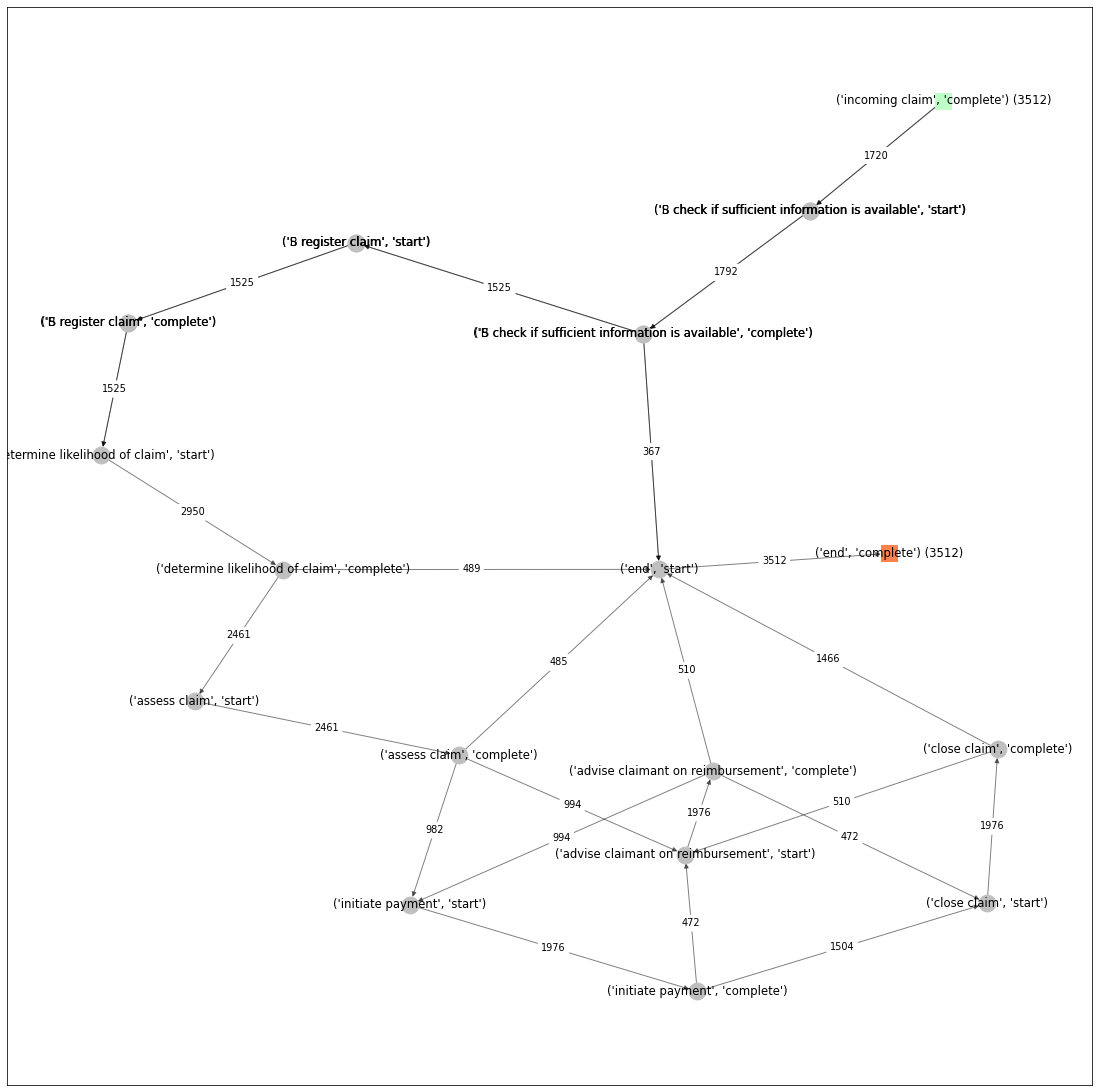

In [7]:
from maxes.analyze_sequence import draw_nx_graph

graph = generator.sequence_graph_

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.dpi = 70
draw_nx_graph(graph, ax=ax, pos=nx.kamada_kawai_layout(graph), edge_label="frequency")

In [19]:
len(log.traces)

3512

In [24]:
generator.traces_count = 1
generated_log = generator.generate()
generated_log.traces[0].df

,concept:name,lifecycle:transition,time:timestamp,call centre,org:resource,location,duration,outcome
0,incoming claim,complete,1970-01-01 04:51:32.893258+00:00,Brisbane,Claims handler,Brisbane,11149,processed
1,B check if sufficient information is available,start,1970-01-01 05:06:29.650237+00:00,Brisbane,Claims handler,Sydney,8687,processed
2,B check if sufficient information is available,complete,1970-01-01 05:06:58.016134+00:00,Brisbane,Claims handler,Brisbane,12019,rejected
3,B register claim,start,1970-01-01 05:06:58.727606+00:00,Brisbane,Claims handler,Brisbane,11380,S insufficient information
4,B register claim,complete,1970-01-01 05:29:52.523814+00:00,Brisbane,Claims handler,Brisbane,6498,rejected
5,determine likelihood of claim,start,1970-01-01 05:46:55.176922+00:00,Sydney,Claims handler,Brisbane,24946,processed
6,determine likelihood of claim,complete,1970-01-01 05:47:06.819768+00:00,Sydney,Claims handler,Sydney,6947,rejected
7,end,start,1970-01-01 05:47:06.819768+00:00,Brisbane,Call Centre Agent Brisbane,Sydney,1296,processed
8,end,complete,1970-01-01 05:47:06.819768+00:00,Sydney,Claims handler,Brisbane,17844,processed


In [9]:
pm4py_log = pm4py.read_xes(log_path)
pm4py_log

parsing log, completed traces ::   0%|          | 0/3512 [00:00<?, ?it/s]

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,case:concept:name,case:description,location,duration,outcome
0,Brisbane,customer,1970-01-01 01:00:00+00:00,complete,incoming claim,0,Simulated process instance,NaN,NaN,NaN
1,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:00+00:00,start,B check if sufficient information is available,0,Simulated process instance,Brisbane,NaN,NaN
2,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:41+00:00,complete,B check if sufficient information is available,0,Simulated process instance,Brisbane,NaN,NaN
3,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:41+00:00,start,B register claim,0,Simulated process instance,NaN,NaN,NaN
4,NaN,Call Centre Agent Brisbane,1970-01-01 01:12:59+00:00,complete,B register claim,0,Simulated process instance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
46133,NaN,Call Centre Agent Sydney,1970-01-01 03:39:31+00:00,complete,S register claim,999,Simulated process instance,NaN,NaN,NaN
46134,NaN,Claims handler,1970-01-01 07:56:04+00:00,start,determine likelihood of claim,999,Simulated process instance,NaN,NaN,NaN
46135,NaN,Claims handler,1970-01-01 07:56:35+00:00,complete,determine likelihood of claim,999,Simulated process instance,NaN,NaN,NaN
46136,NaN,Claims handler,1970-01-01 07:56:35+00:00,start,end,999,Simulated process instance,NaN,17306,not liable


In [10]:
net, im, fm = pm4py.discover_petri_net_inductive(pm4py_log)
net, im, fm

(places: [ p_10, p_11, p_13, p_14, p_15, p_17, p_18, p_20, p_21, p_22, p_23, p_25, p_26, p_27, p_31, p_32, p_37, p_38, p_4, p_40, p_41, p_43, p_44, p_5, p_6, p_7, p_8, sink, source ]
 transitions: [ (1399bbcb-85f3-4c52-9236-c7678eff087a, 'S register claim'), (14d3a6c5-48dd-43b5-815a-4172bf02c0e6, 'initiate payment'), (48561042-47eb-4043-9e58-609804a8dcab, 'determine likelihood of claim'), (53b5957c-0061-4b1b-a7a3-bb2c6fecfa02, 'end'), (61761b02-9ea5-4d6a-9b9d-d172932b6967, 'incoming claim'), (73175cde-3f7c-4068-9367-fc5015fdcbd0, 'close claim'), (a1e9be19-dc65-48b6-b6b6-db5822960889, 'S check if sufficient information is available'), (c0ec0739-3fc3-42ce-a99f-48862c5a7ad5, 'B check if sufficient information is available'), (d438ba8e-bfd2-4ce2-a67b-2d26ee120df6, 'B register claim'), (d9a1e781-9a13-41bc-ad6f-3453743e8dec, 'advise claimant on reimbursement'), (ed7c5c4f-4064-4071-926e-0c8206ffaba2, 'assess claim'), (init_loop_11, None), (init_loop_16, None), (init_loop_2, None), (init_loop_

In [22]:
generated_log.update_df()
generated_log.df["case:concept:name"] = "0"
generated_log.df

,concept:name,lifecycle:transition,time:timestamp,call centre,org:resource,location,duration,outcome,case:concept:name
0,incoming claim,complete,1970-01-01 06:15:30.676169+00:00,Brisbane,Claims handler,Sydney,9333,processed,0
1,B check if sufficient information is available,start,1970-01-01 06:46:08.543725+00:00,Sydney,Claims handler,Sydney,11200,B insufficient information,0
2,B check if sufficient information is available,complete,1970-01-01 06:46:29.394065+00:00,Sydney,Claims handler,Sydney,1689,not liable,0
3,end,start,1970-01-01 06:46:29.394065+00:00,Brisbane,Claims handler,Brisbane,1963,processed,0
4,end,complete,1970-01-01 06:46:29.999570+00:00,Sydney,Claims handler,Brisbane,2049,processed,0


In [14]:
log.traces[0].df

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,location,duration,outcome
0,Brisbane,customer,1970-01-01 00:00:00+00:00,complete,incoming claim,NaN,NaN,NaN
1,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:00+00:00,start,B check if sufficient information is available,Brisbane,NaN,NaN
2,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:41+00:00,complete,B check if sufficient information is available,Brisbane,NaN,NaN
3,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:41+00:00,start,B register claim,NaN,NaN,NaN
4,NaN,Call Centre Agent Brisbane,1970-01-01 00:12:59+00:00,complete,B register claim,NaN,NaN,NaN
5,NaN,Claims handler,1970-01-01 00:47:04+00:00,start,determine likelihood of claim,NaN,NaN,NaN
6,NaN,Claims handler,1970-01-01 00:47:12+00:00,complete,determine likelihood of claim,NaN,NaN,NaN
7,NaN,Claims handler,1970-01-01 00:47:12+00:00,start,end,NaN,2832,not liable
8,NaN,Claims handler,1970-01-01 00:47:12+00:00,complete,end,NaN,2832,not liable


In [18]:
# generated_log.df = log.traces[0].df

generated_log.df["location"] = np.nan
generated_log.df["duration"] = np.nan
generated_log.df["call centre"] = np.nan
generated_log.df["org:resource"] = np.nan

generated_log.df

,concept:name,lifecycle:transition,time:timestamp,call centre,org:resource,location,duration,outcome,case:concept:name
0,incoming claim,complete,1970-01-01 00:07:17.748645+00:00,NaN,NaN,NaN,NaN,processed,0
1,S check if sufficient information is available,start,1970-01-01 00:10:13.693670+00:00,NaN,NaN,NaN,NaN,rejected,0
2,S check if sufficient information is available,complete,1970-01-01 00:10:32.272215+00:00,NaN,NaN,NaN,NaN,S insufficient information,0
3,S register claim,start,1970-01-01 00:10:32.447040+00:00,NaN,NaN,NaN,NaN,not liable,0
4,S register claim,complete,1970-01-01 00:13:22.285684+00:00,NaN,NaN,NaN,NaN,not liable,0
5,determine likelihood of claim,start,1970-01-01 01:07:38.716606+00:00,NaN,NaN,NaN,NaN,processed,0
6,determine likelihood of claim,complete,1970-01-01 01:08:09.727618+00:00,NaN,NaN,NaN,NaN,S insufficient information,0
7,assess claim,start,1970-01-01 01:08:10.325697+00:00,NaN,NaN,NaN,NaN,processed,0
8,assess claim,complete,1970-01-01 01:16:52.638473+00:00,NaN,NaN,NaN,NaN,not liable,0
9,initiate payment,start,1970-01-01 01:16:52.638473+00:00,NaN,NaN,NaN,NaN,processed,0


In [23]:
pm4py.conformance.precision_alignments(generated_log.df, net, im, fm)

computing precision with alignments, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

0.41666666666666663

In [13]:
net

places: [ p_10, p_11, p_13, p_14, p_15, p_17, p_18, p_20, p_21, p_22, p_23, p_25, p_26, p_27, p_31, p_32, p_37, p_38, p_4, p_40, p_41, p_43, p_44, p_5, p_6, p_7, p_8, sink, source ]
transitions: [ (1399bbcb-85f3-4c52-9236-c7678eff087a, 'S register claim'), (14d3a6c5-48dd-43b5-815a-4172bf02c0e6, 'initiate payment'), (48561042-47eb-4043-9e58-609804a8dcab, 'determine likelihood of claim'), (53b5957c-0061-4b1b-a7a3-bb2c6fecfa02, 'end'), (61761b02-9ea5-4d6a-9b9d-d172932b6967, 'incoming claim'), (73175cde-3f7c-4068-9367-fc5015fdcbd0, 'close claim'), (a1e9be19-dc65-48b6-b6b6-db5822960889, 'S check if sufficient information is available'), (c0ec0739-3fc3-42ce-a99f-48862c5a7ad5, 'B check if sufficient information is available'), (d438ba8e-bfd2-4ce2-a67b-2d26ee120df6, 'B register claim'), (d9a1e781-9a13-41bc-ad6f-3453743e8dec, 'advise claimant on reimbursement'), (ed7c5c4f-4064-4071-926e-0c8206ffaba2, 'assess claim'), (init_loop_11, None), (init_loop_16, None), (init_loop_2, None), (init_loop_21

In [32]:
generated_log.df

,concept:name,lifecycle:transition,time:timestamp,call centre,org:resource,location,duration,outcome,case:concept:name
0,incoming claim,complete,1970-01-01 02:19:44.258652+00:00,Brisbane,Call Centre Agent Brisbane,Brisbane,24453,S insufficient information,0
1,B check if sufficient information is available,start,1970-01-01 03:19:14.661701+00:00,Sydney,Claims handler,Brisbane,9150,processed,0
2,B check if sufficient information is available,complete,1970-01-01 03:20:30.715537+00:00,Brisbane,Claims handler,Sydney,6620,processed,0
3,B register claim,start,1970-01-01 03:20:30.715537+00:00,Sydney,Claims handler,Sydney,15553,not liable,0
4,B register claim,complete,1970-01-01 03:34:37.679833+00:00,Brisbane,Call Centre Agent Sydney,Brisbane,1853,rejected,0
5,determine likelihood of claim,start,1970-01-01 05:31:38.216774+00:00,Brisbane,customer,Sydney,22443,processed,0
6,determine likelihood of claim,complete,1970-01-01 05:32:04.407274+00:00,Brisbane,Claims handler,Sydney,8555,processed,0
7,assess claim,start,1970-01-01 05:32:04.407274+00:00,Sydney,Call Centre Agent Sydney,Sydney,2620,processed,0
8,assess claim,complete,1970-01-01 05:35:55.325023+00:00,Brisbane,Claims handler,Sydney,24758,not liable,0
9,end,start,1970-01-01 05:35:55.359951+00:00,Sydney,Claims handler,Sydney,2,processed,0


In [37]:
log.traces[0].df["case:concept:name"] = "0"
log.traces[0].df

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,location,duration,outcome,case:concept:name
0,Brisbane,customer,1970-01-01 00:00:00+00:00,complete,incoming claim,NaN,NaN,NaN,0
1,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:00+00:00,start,B check if sufficient information is available,Brisbane,NaN,NaN,0
2,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:41+00:00,complete,B check if sufficient information is available,Brisbane,NaN,NaN,0
3,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:41+00:00,start,B register claim,NaN,NaN,NaN,0
4,NaN,Call Centre Agent Brisbane,1970-01-01 00:12:59+00:00,complete,B register claim,NaN,NaN,NaN,0
5,NaN,Claims handler,1970-01-01 00:47:04+00:00,start,determine likelihood of claim,NaN,NaN,NaN,0
6,NaN,Claims handler,1970-01-01 00:47:12+00:00,complete,determine likelihood of claim,NaN,NaN,NaN,0
7,NaN,Claims handler,1970-01-01 00:47:12+00:00,start,end,NaN,2832,not liable,0
8,NaN,Claims handler,1970-01-01 00:47:12+00:00,complete,end,NaN,2832,not liable,0


In [38]:
pm4py.conformance.precision_alignments(log.traces[0].df, net, im, fm)

computing precision with alignments, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

0.375

In [45]:

for i in range(5):
    generator.traces_count = 1
    generated_log = generator.generate()
    # generated_log.traces[0].df

    generated_log.update_df()
    generated_log.df["case:concept:name"] = "0"
    # generated_log.df["time:timestamp"] = np.nan
    # generated_log.df

    # precision_alignments = pm4py.conformance.precision_alignments(generated_log.df, net, im, fm)
    # print(precision_alignments)


    precision_token_based_replay = pm4py.conformance.fitness_token_based_replay(generated_log.df, net, im, fm)
    print(precision_token_based_replay)


{'perc_fit_traces': 0.0, 'average_trace_fitness': 0.9601706970128023, 'log_fitness': 0.9601706970128023, 'percentage_of_fitting_traces': 0.0}
{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
